In [521]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import math
import seaborn as sb
from matplotlib import pyplot as plt

In [522]:
# loads and read csv file
df_original=pd.read_csv("Churn_Modelling.csv",delimiter=",")
df =df_original
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [524]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [525]:
# checks data types of columns
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [526]:
# checks for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [527]:
# checks for duplicate values
df.duplicated().sum()

0

In [528]:
# display column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [529]:
# display shape of the dataframe
df.shape

(10000, 14)

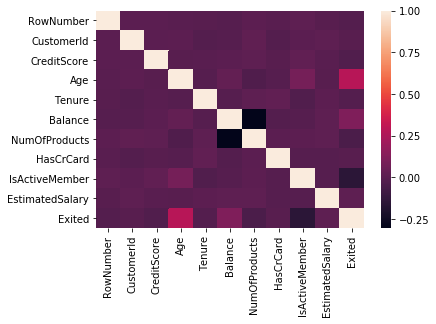

In [530]:
# checks correlation with all columns
corr=df.corr()
sb.heatmap(corr)

In [531]:
# checks correlation with all columns
print(corr['Exited'].sort_values(ascending=True)[:])

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64


In [532]:
# dropping columns whose relation is weak with label column
df.drop(['HasCrCard','Surname','CustomerId'],axis=1,inplace=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [533]:
# return unique values in given column
df['Exited'].unique()

array([1, 0])

In [534]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

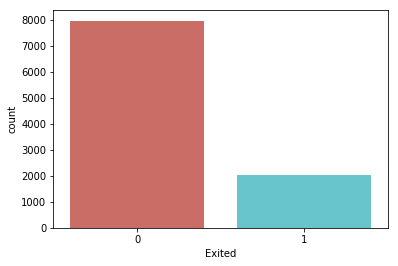

In [535]:
sb.countplot(x='Exited',data=df,palette='hls')

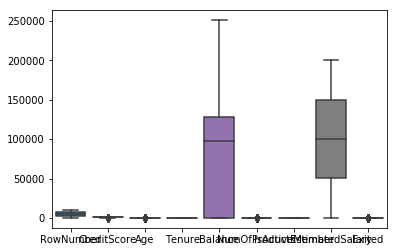

In [536]:
sb.boxplot(data=df)

/home/ubuntu/anaconda3/envs/testindatavenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


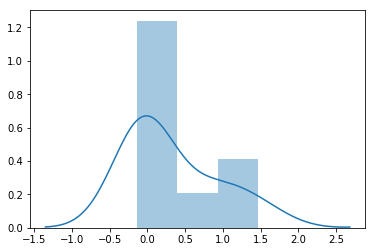

In [537]:
# display skewness of dataframe
target=df.skew()
sb.distplot(target)

In [538]:
df.shape

(10000, 11)

In [539]:
# convert categorical data into dummy (binary)  variables 
df=pd.get_dummies(df)

In [540]:
df.shape

(10000, 14)

In [541]:
# scales the limit of variable
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [542]:
df = Feature_Scaling(df)
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.0000,0.538,0.324324,0.2,0.000000,0.000000,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0001,0.516,0.310811,0.1,0.334031,0.000000,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0002,0.304,0.324324,0.8,0.636357,0.666667,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0003,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0004,1.000,0.337838,0.2,0.500246,0.000000,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0


In [543]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,0.601058,0.282727,0.501280,0.304848,0.176733,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,0.288718,0.193307,0.141727,0.289217,0.248696,0.193885,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.468000,0.189189,0.300000,0.000000,0.000000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.604000,0.256757,0.500000,0.387402,0.000000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.750000,0.736000,0.351351,0.700000,0.508749,0.333333,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [544]:
# splits the data in 70% & 30% format 
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

train,test = Split(df)

In [545]:
train_data=df.head(train)
test_data=df.tail(test)

In [546]:
# Separating the output(label) and the parameters(features) of dataframe
def separate(df):
    output = df.Exited
    return df.drop('Exited', axis=1), output

x_data_train,y_data_train = separate(train_data)

In [547]:
x_data_test,y_data_test=separate(test_data)

In [548]:
df.shape

(10000, 14)

In [549]:
class MultiLayerNeural:
    def __init__(self):
        self.alpha = 0.1
        self.epoch = 1000
    
        
    def Train(self,x_train_data, y_train_data):
        weight=[]
        bias=[]
        # Initializing layers
        layers=[x_train_data.shape[1],4,5,3,1]
        db=0.0
        a = [0] * len(layers)
        z = [0] * len(layers)
        A = [0] * len(layers)
        dg = [0] * len(layers)
        da = [0] * len(layers)
        dz = [0] * len(layers)
        db = [0] * len(layers)
        dw = [0] * len(layers)
    
        a[0]=x_train_data.T
        
        # Initializing weights and bias for all layers     
        for i in range(len(layers)):
            weight.append(np.random.rand(layers[i],layers[i-1])*0.001)
            bias.append(np.zeros(((layers[i],1))))    
        
        # forward propagation         
        for length in range(self.epoch):
            for i in range(1,len(layers)):
                z[i] = np.dot(weight[i],a[i-1])+bias[i]
                a[i] = (1 / (1 + np.exp(-z[i])))
            
        # backward propagation
        
            for i in reversed(range(1,len(layers))):
                da[i]=(-(y_train_data.T/a[i])+((1-y_train_data.T)/(1-a[i])))
                dg[i] = (1 / (1 + np.exp(-z[i]))) * (1 - (1 / (1 + np.exp(-z[i]))))
                dz[i]=da[i]*dg[i]
                dw[i]=(np.dot(dz[i],a[i-1].T)/len(x_train_data))
                db[i]=(np.sum(dz[i],axis=1,keepdims=True)/len(x_train_data))
                weight[i]=(weight[i]-(np.dot(self.alpha,dw[i])))
                bias[i]=(bias[i]-(np.dot(self.alpha,db[i])))
        return weight,bias

    def Test_data(self, x_test_data, weight,bias): 
        layers=[x_test_data.shape[1],4,5,3,1]
        
        a = [0] * len(layers)
        z = [0] * len(layers)
        a[0]=x_test_data.T
        
        # testing test data on Activation/Hypothesis Function 
        for i in range(1,len(layers)):
            z[i] = np.dot(weight[i],a[i-1])+bias[i]
            a[i] = (1 / (1 + np.exp(-z[i])))
#         print(len(a))
        return a[-1]
          
    def Accuracy(self, y_test_data, y_predict):
        y_predict = np.nan_to_num(y_predict)
   
        test_accuracy = 100 - (np.mean(np.abs(y_predict - y_test_data)) * 100)        
        return test_accuracy

def main():
    # creates class object 
    obj = MultiLayerNeural()
    
    # convert data into numpy array     
    x_train_data = np.array(x_data_train)
    y_train_data = np.array(y_data_train)
    y_train_data = y_train_data.reshape(len(y_train_data),1)
        
    x_test_data = np.array(x_data_test)
    y_test_data = np.array(y_data_test)
    y_test_data = y_test_data.reshape(len(y_test_data),1)
    
#     print("x_train_data",x_train_data.shape)
#     print("y_train_data",y_train_data.shape) 
#     print("x_test_data",x_test_data.shape)
#     print("y_test_data",y_test_data.shape)  
    
       
     # calling method by class object to get weights and bias
    weights,b = obj.Train(x_train_data, y_train_data)

    # getting prediction values    
    y_predict_train = obj.Test_data(x_train_data, weights,b)
    y_predict_test = obj.Test_data(x_test_data, weights,b)

    # getting accuracy     
    acc_train=obj.Accuracy(y_predict_train,y_train_data)
    print("\n\naccuracy of train data=",acc_train)
    
    acc_test=obj.Accuracy(y_predict_test,y_test_data)
    print("accuracy of test data=",acc_test)
    
if __name__ == '__main__':
    main()
    



accuracy of train data= 67.31049406302269
accuracy of test data= 67.79940420441929
